In [1]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load paths
# path_VM = ../../dvm-dos-tem/mads_calibration/'
samples='sample_matrix.csv'
results='results.txt'
results_new='results.csv'
path_EML='EML21/'
path_MD3='MD3/'
path_MD1='MD1/'
path_TK='TK/'
path_USPrr='US-Prr/SA/'

In [3]:
#Load Functions

def z_score(y_short,y_long,outnames):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    outnames : dataframe header
    '''

    zscore=[]
    for iname in outnames:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
    
    return zscore

In [4]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# MAE is computed by taking the absolute difference between each target value and its corresponding 
# model output value (over all runs), and then taking the average of these absolute differences. n=num simulations
# MAE = (1 / n) * Σ|target_i - model_i|
# Calculate the mean of the absolute values of the target values.
# Mean Absolute Target Value = (1 / n) * Σ|target_i|
# NMAE = (MAE / Mean Absolute Target Value) * 100

def calculate_nmae(df_model,ymodel):
    '''    
    df_model: model dataframe
    ymodel: full dataframe constrained by error
    '''
    targets = df_model.iloc[-1, :]
    [n,m]=np.shape(ymodel)
    df=(abs(ymodel.iloc[:-1,:] - df_model.iloc[-1, :]))
    column_sums = df.sum(axis=0)
    mae = column_sums /(n-1) 
    mean_abs_target = np.abs(targets).mean()
    nmae = (mae / mean_abs_target) * 100
    return nmae

In [5]:
def site_metric_matrix(metric_matrix, metric):
    '''    
    metric_matrix: matrix (dataframe) of metric to plot. cols = sites, rows = targets
    metric: string of the name of the metric, ex; 'NMAE'
    '''
    #if metric=='Zscore':
        
    n_rows, n_cols = metric_matrix.shape
    fig, ax = plt.subplots(figsize=(n_cols, n_rows))
    sns.heatmap(metric_matrix, cmap="coolwarm", annot=True, fmt=".2f")
    ax.set_xlabel('Sites')
    ax.set_ylabel('Targets')
    ax.set_title(metric + ' Matrix')
    plt.show()
    return

# cmax -> GPP

In [16]:
# Load EML21
sa_folder='sa_cmax_EML21_090_AK/'
df_param = pd.read_csv(path_EML+sa_folder+samples)
df_model = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
df_model.columns = output_name
units = 'gC/m2/year'

xparams, ymodel =  ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)

In [7]:
# Load MD3
sa_folder = 'sa_cmax_MD3_050_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

output_name_MD3 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD3.columns = output_name_MD3

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=0.97)

In [8]:
# Load MD1
sa_folder = 'SA-MD1-STEP1/'
print(path_MD1+sa_folder+samples)
df_param_MD1 = pd.read_csv(path_MD1+sa_folder+samples)
df_model_MD1 = pd.read_csv(path_MD1+sa_folder+results,header=None)

output_name_MD1 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD1.columns = output_name_MD1
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=0.97)

MD1/SA-MD1-STEP1/sample_matrix.csv


In [9]:
# Load TK
sa_folder = 'sa-cmax-TK-075-EJ/'
print(path_TK+sa_folder+samples)
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

output_name_TK = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
df_model_TK.columns = output_name_TK
xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=0.97)

TK/sa-cmax-TK-075-EJ/sample_matrix.csv


In [10]:
# Load US-Prr
sa_folder = 'STEP1-cmax-GPP/'
print(path_USPrr+sa_folder+samples)
df_param_USPrr = pd.read_csv(path_USPrr+sa_folder+samples)
df_model_USPrr = pd.read_csv(path_USPrr+sa_folder+'results.csv',header=None)

output_name_USPrr = ['GPP0','GPP1','GPP2','GPP3','GPP4']
df_model_USPrr.columns = output_name_USPrr
xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=0.97)

US-Prr/SA/STEP1-cmax-GPP/sample_matrix.csv


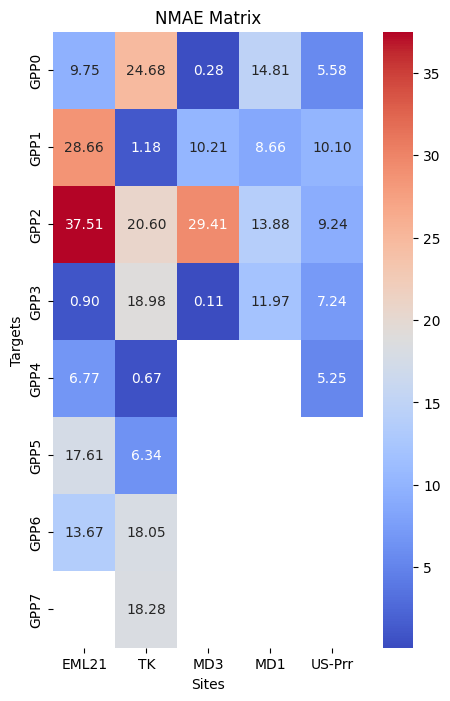

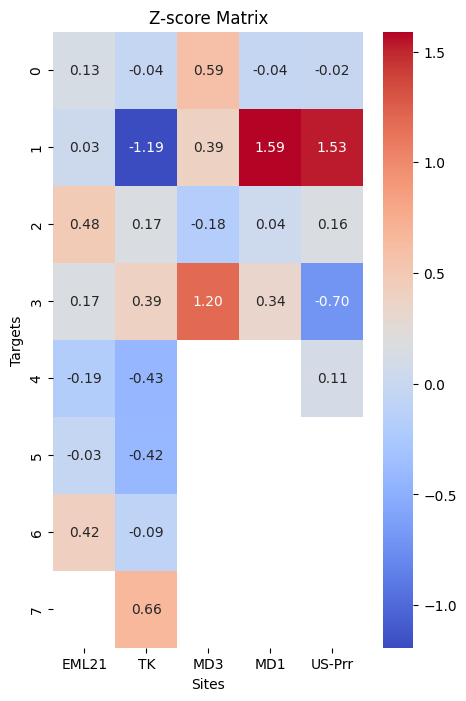

In [43]:
#PLOT NMAE
nmae = calculate_nmae(df_model,ymodel)
nmae_tk = calculate_nmae(df_model_TK,ymodel_TK)
nmae_md3 = calculate_nmae(df_model_MD3,ymodel_MD3)
nmae_md1 = calculate_nmae(df_model_MD1,ymodel_MD1)
nmae_usprr = calculate_nmae(df_model_USPrr,ymodel_USPrr)
nmae_matrix = pd.DataFrame({'EML21': nmae[:7], 'TK': nmae_tk, 'MD3': nmae_md3, 'MD1': nmae_md1, 'US-Prr': nmae_usprr})
site_metric_matrix(nmae_matrix, 'NMAE')

#PLOT ZSCORE:
z = z_score(ymodel,df_model,output_name)
z = pd.Series(z[:7], dtype=float)
z_tk = z_score(ymodel_TK,df_model_TK,output_name_TK)
z_tk = pd.Series(z_tk, dtype=float)
z_md3 = z_score(df_model_MD3,ymodel_MD3,output_name_MD3)
z_md3 = pd.Series(z_md3, dtype=float)
z_md1 = z_score(df_model_MD1,ymodel_MD1,output_name_MD1)
z_md1 = pd.Series(z_md1, dtype=float)
z_usprr = z_score(df_model_USPrr,ymodel_USPrr, output_name_USPrr)
z_usprr = pd.Series(z_usprr, dtype=float)
z_matrix = pd.DataFrame({'EML21': z, 'TK': z_tk, 'MD3': z_md3, 'MD1': z_md1, 'US-Prr': z_usprr})
site_metric_matrix(z_matrix.iloc[:8,:], 'Z-score')

# nmax+krb -> NPP+VEGC

In [44]:
#Load EML21
per_number=0.5
sa_folder = 'sa_nmaxkrb_EML21_090_AK-2/'
df_param = pd.read_csv(path_EML+sa_folder+samples)
df_model = pd.read_csv(path_EML+sa_folder+results,header=None)

#output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',\
#               'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06',\
#                'VEGC10','VEGC11',\
#                'VEGC20','VEGC21','VEGC22','VEGC23']

output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',\
               'VEGC00','VEGC10','VEGC20',\
               'VEGC01','VEGC11','VEGC21',\
               'VEGC02','VEGC22',\
               'VEGC03','VEGC23',\
               'VEGC04','VEGC05','VEGC06']
df_model.columns = output_name
units_NPP = 'gC/m2/year'
units_VEGC = 'gC/m2'

xparams, ymodel =  ut.get_params_r2_rmse(df_param,df_model,r2lim=per_number)

In [45]:
#Load MD3
sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

#output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
#                'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
#               'VEGC20','VEGC21','VEGC22']

output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD3.columns = output_name_MD3

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=per_number)

In [46]:
#MD1
sa_folder = 'SA-MD1-STEP2/'
df_param_MD1 = pd.read_csv(path_MD1+sa_folder+samples)
df_model_MD1 = pd.read_csv(path_MD1+sa_folder+'results.csv',header=None)
output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',
                   'VEGC03'\
                   ]
df_model_MD1.columns = output_name_MD1

xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=per_number)

In [47]:
#TK
sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

output_name_TK = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7',\
                  'VEGC00','VEGC10','VEGC20',\
                  'VEGC01','VEGC11','VEGC21',\
                  'VEGC02','VEGC12','VEGC22',\
                  'VEGC03','VEGC23',\
                  'VEGC04','VEGC24',\
                  'VEGC05','VEGC06','VEGC07'
                  ]

df_model_TK.columns = output_name_TK

xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=per_number)

In [48]:
#US-Prr
sa_folder = 'STEP2-nmax_krb-NPP_vegc/'
df_param_USPrr = pd.read_csv(path_USPrr+sa_folder+samples)
df_model_USPrr = pd.read_csv(path_USPrr+sa_folder+'results.csv',header=None)

output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04'
                     ]

df_model_USPrr.columns = output_name_USPrr

xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=per_number)

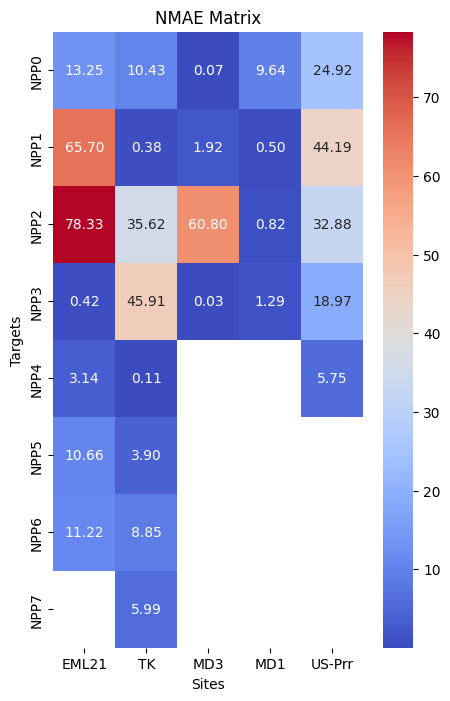

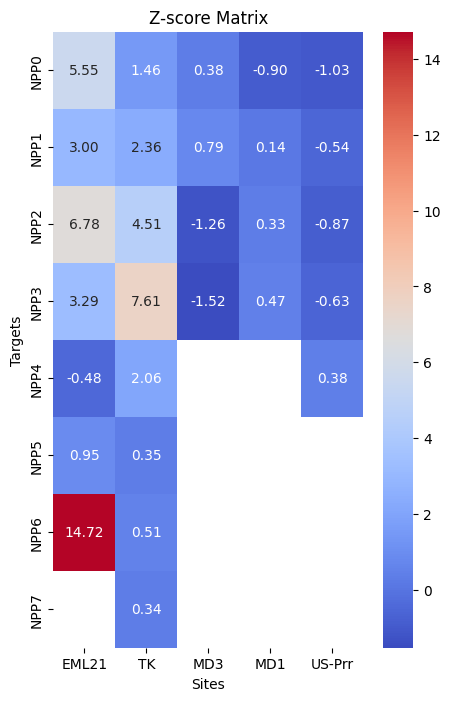

In [72]:
nmae = calculate_nmae(df_model,ymodel)
nmae_tk = calculate_nmae(df_model_TK,ymodel_TK)
nmae_3 = calculate_nmae(df_model_MD3,ymodel_MD3)
nmae_md1 = calculate_nmae(df_model_MD1,ymodel_MD1)
nmae_usprr = calculate_nmae(df_model_USPrr,ymodel_USPrr)

nmae_matrix = pd.DataFrame({'EML21': nmae, 'TK': nmae_tk, 'MD3': nmae_3, 'MD1': nmae_md1, 'US-Prr': nmae_usprr})

site_metric_matrix(nmae_matrix.iloc[:8,:], 'NMAE')

#PLOT ZSCORE:
z = z_score(ymodel,df_model,output_name)
z = pd.Series(z, dtype=float)
z_tk = z_score(ymodel_TK,df_model_TK,output_name_TK)
z_tk = pd.Series(z_tk, dtype=float)
z_md3 = z_score(df_model_MD3,ymodel_MD3,output_name_MD3)
z_md3 = pd.Series(z_md3, dtype=float)
z_md1 = z_score(df_model_MD1,ymodel_MD1,output_name_MD1)
z_md1 = pd.Series(z_md1, dtype=float)
z_usprr = z_score(df_model_USPrr,ymodel_USPrr, output_name_USPrr)
z_usprr = pd.Series(z_usprr, dtype=float)

z_matrix = pd.DataFrame({'EML21': z[:7], 'TK': z_tk[:8], 'MD3': z_md3[:4], 'MD1': z_md1[:4], 'US-Prr': z_usprr[:5]})
z_matrix.index=output_name_TK[:8]

site_metric_matrix(z_matrix.iloc[:8,:], 'Z-score')

# nmax+krb+cfall+nfall -> NPP + VEGC + VEGN

In [36]:
#Load EML21
per_number=0.5
sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
df_param = pd.read_csv(path_EML+sa_folder+samples)
df_model = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',\
               'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06',\
                'VEGC10','VEGC11',\
                'VEGC20','VEGC21','VEGC22','VEG23',\
                'VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06',\
                'VEGN10','VEGN11',\
                'VEGN20','VEGN21','VEGN22','VEGN23']
df_model.columns = output_name
units_NPP = 'gC/m2/year'
units_VEGC = 'gC/m2'

headers_leaf = ['VEGC00', 'VEGN00']
headers_stem = ['VEGC10', 'VEGN10']
headers_root = ['VEGC20', 'VEGN20']

# Find the indices for each compartment (VEGC and VEGN)
idl = [output_name.index(header) for header in headers_leaf]
ids = [output_name.index(header) for header in headers_stem]
idr = [output_name.index(header) for header in headers_root]

xparams, ymodel =  ut.get_params_r2_rmse(df_param,df_model,r2lim=per_number)

In [37]:
#Load MD3
sa_folder = 'sa_nmaxkrbcfallnfall_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results_new,header=None)

output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
               'VEGC00','VEGC01','VEGC02','VEGC03',\
                'VEGC10','VEGC11','VEGC12',\
                'VEGC20','VEGC21','VEGC22',\
                'VEGN00','VEGN01','VEGN02','VEGN03',\
                'VEGN10','VEGN11','VEGN12',\
                'VEGN20','VEGN21','VEGN22']
df_model_MD3.columns = output_name_MD3

# Find the indices for each compartment (VEGC and VEGN)
idl_MD3 = [output_name_MD3.index(header) for header in headers_leaf]
ids_MD3 = [output_name_MD3.index(header) for header in headers_stem]
idr_MD3 = [output_name_MD3.index(header) for header in headers_root]

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=per_number,n_top_runs=20)

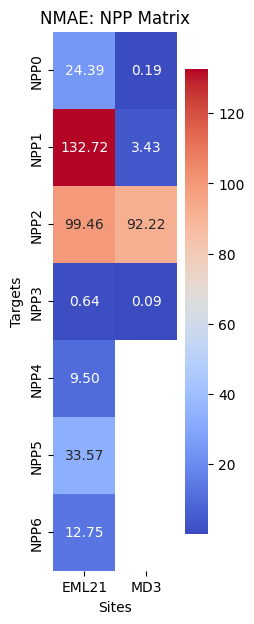

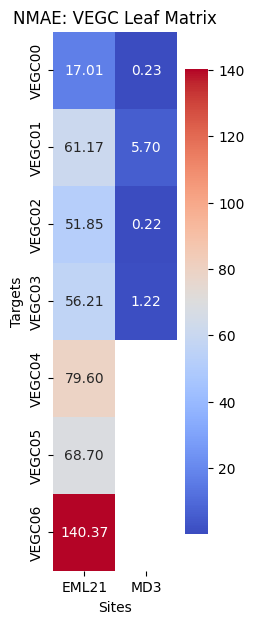

In [38]:
nmae = calculate_nmae(df_model,ymodel)
nmae_NPP = nmae[:idl[0]]
nmae_lC = nmae[idl[0]:ids[0]]
nmae_sC = nmae[ids[0]:idr[0]]
nmae_rC = nmae[idr[0]:]
nmae_lN = nmae[idl[1]:ids[1]]
nmae_sN = nmae[ids[1]:idr[1]]
nmae_rN = nmae[idr[1]:]

# nmae_tk = calculate_nmae(df_model_TK,ymodel_TK)
nmae_3 = calculate_nmae(df_model_MD3,ymodel_MD3)
nmae_3_NPP = nmae_3[:idl_MD3[0]]
nmae_3_lC = nmae_3[idl_MD3[0]:ids_MD3[0]]
nmae_3_sC = nmae_3[ids_MD3[0]:idr_MD3[0]]
nmae_3_rC = nmae_3[idr_MD3[0]:]
nmae_3_lN = nmae_3[idl_MD3[1]:ids_MD3[1]]
nmae_3_sN = nmae_3[ids_MD3[1]:idr_MD3[1]]
nmae_3_rN = nmae_3[idr_MD3[1]:]
# nmae_md1 = calculate_nmae(df_model_MD1,ymodel_MD1)
# nmae_usprr = calculate_nmae(df_model_USPrr,ymodel_USPrr)


nmae_matrix_NPP = pd.DataFrame({'EML21': nmae_NPP, 'MD3': nmae_3_NPP})
nmae_matrix_lC = pd.DataFrame({'EML21': nmae_lC, 'MD3': nmae_3_lC})
nmae_matrix_sC = pd.DataFrame({'EML21': nmae_sC, 'MD3': nmae_3_sC})
nmae_matrix_rC = pd.DataFrame({'EML21': nmae_rC, 'MD3': nmae_3_rC})
nmae_matrix_lN = pd.DataFrame({'EML21': nmae_lN, 'MD3': nmae_3_lN})
nmae_matrix_sN = pd.DataFrame({'EML21': nmae_sN, 'MD3': nmae_3_sN})
nmae_matrix_rN = pd.DataFrame({'EML21': nmae_rN, 'MD3': nmae_3_rN})

site_metric_matrix(nmae_matrix_NPP, 'NMAE: NPP')
site_metric_matrix(nmae_matrix_lC, 'NMAE: VEGC Leaf')

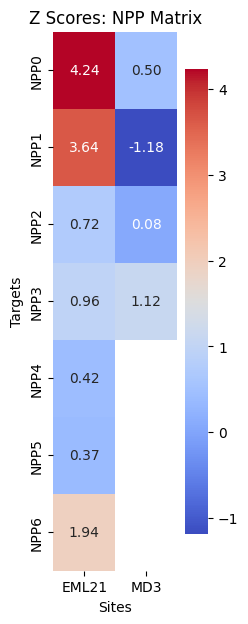

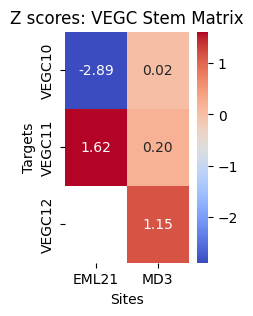

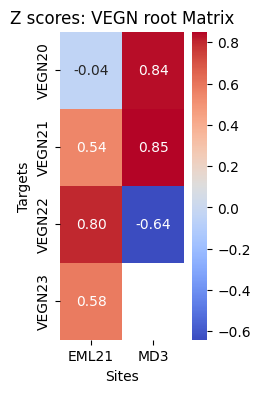

In [73]:
#PLOT ZSCORE:
z = z_score(ymodel,df_model,output_name)
# z = pd.Series(z, dtype=float)
z_NPP = pd.Series(z[:idl[0]], dtype=float)
z_lC = pd.Series(z[idl[0]:ids[0]], dtype=float)
z_sC = pd.Series(z[ids[0]:idr[0]], dtype=float)
z_rC = pd.Series(z[idr[0]:], dtype=float)
z_lN = pd.Series(z[idl[1]:ids[1]], dtype=float)
z_sN = pd.Series(z[ids[1]:idr[1]], dtype=float)
z_rN = pd.Series(z[idr[1]:], dtype=float)

# z_tk = z_score(ymodel_TK,df_model_TK,output_name_TK)
# z_tk = pd.Series(z_tk, dtype=float)
z_md3 = z_score(df_model_MD3,ymodel_MD3,output_name_MD3)
# z_md3 = pd.Series(z_md3, dtype=float)
z_3_NPP = pd.Series(z_md3[:idl_MD3[0]], dtype=float)
z_3_lC = pd.Series(z_md3[idl_MD3[0]:ids_MD3[0]], dtype=float)
z_3_sC = pd.Series(z_md3[ids_MD3[0]:idr_MD3[0]], dtype=float)
z_3_rC = pd.Series(z_md3[idr_MD3[0]:], dtype=float)
z_3_lN = pd.Series(z_md3[idl_MD3[1]:ids_MD3[1]], dtype=float)
z_3_sN = pd.Series(z_md3[ids_MD3[1]:idr_MD3[1]], dtype=float)
z_3_rN = pd.Series(z_md3[idr_MD3[1]:], dtype=float)

z_matrix_NPP = pd.DataFrame({'EML21': z_NPP, 'MD3': z_3_NPP})
z_matrix_lC = pd.DataFrame({'EML21': z_lC, 'MD3': z_3_lC})
z_matrix_sC = pd.DataFrame({'EML21': z_sC, 'MD3': z_3_sC})
z_matrix_rC = pd.DataFrame({'EML21': z_rC, 'MD3': z_3_rC})
z_matrix_lN = pd.DataFrame({'EML21': z_lN, 'MD3': z_3_lN})
z_matrix_sN = pd.DataFrame({'EML21': z_sN, 'MD3': z_3_sN})
z_matrix_rN = pd.DataFrame({'EML21': z_rN, 'MD3': z_3_rN})

z_matrix_NPP.index=output_name[:idl[0]] #USE SITE WITH LARGEST NUMBER OF PFTS TO NAME OUTPUT VARS
site_metric_matrix(z_matrix_NPP, 'Z Scores: NPP')

z_matrix_sC.index=output_name_MD3[ids_MD3[0]:idr_MD3[0]] #USE SITE WITH LARGEST NUMBER OF PFTS TO NAME OUTPUT VARS
site_metric_matrix(z_matrix_sC, 'Z scores: VEGC Stem')

z_matrix_rN.index=output_name[idr[1]:] #USE SITE WITH LARGEST NUMBER OF PFTS TO NAME OUTPUT VARS
site_metric_matrix(z_matrix_rN, 'Z scores: VEGN root')

# soil parameters -> below-ground targets

In [90]:
#Load EML21
per_number=0.5
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param = pd.read_csv(path_EML+sa_folder+samples)
df_model = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model.columns = output_name

xparams, ymodel =  ut.get_params_r2_rmse(df_param,df_model,r2lim=per_number)

In [93]:
#Load MD3
per_number=0.5
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

output_name_MD3 = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_MD3.columns = output_name_MD3

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=per_number)

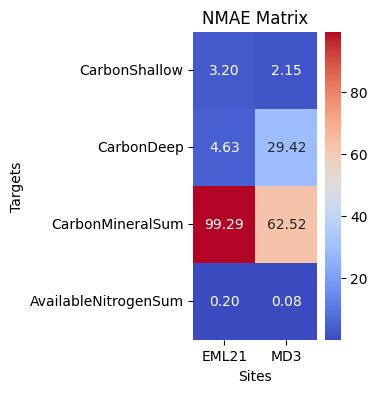

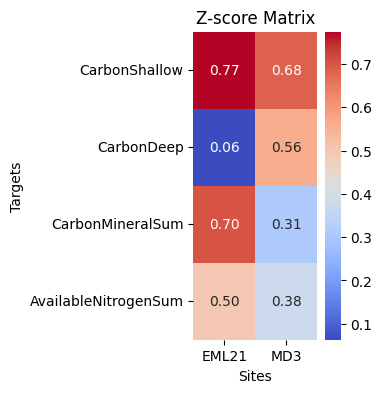

In [94]:
nmae = calculate_nmae(df_model,ymodel)
# nmae_tk = calculate_nmae(df_model_TK,ymodel_TK)
nmae_3 = calculate_nmae(df_model_MD3,ymodel_MD3)
# nmae_md1 = calculate_nmae(df_model_MD1,ymodel_MD1)
# nmae_usprr = calculate_nmae(df_model_USPrr,ymodel_USPrr)

nmae_matrix = pd.DataFrame({'EML21': nmae, 'MD3': nmae_3})

site_metric_matrix(nmae_matrix.iloc[:,:], 'NMAE')

#PLOT ZSCORE:
z = z_score(ymodel,df_model,output_name)
z = pd.Series(z, dtype=float)
# z_tk = z_score(ymodel_TK,df_model_TK,output_name_TK)
# z_tk = pd.Series(z_tk, dtype=float)
z_md3 = z_score(df_model_MD3,ymodel_MD3,output_name_MD3)
z_md3 = pd.Series(z_md3, dtype=float)
# z_md1 = z_score(df_model_MD1,ymodel_MD1,output_name_MD1)
# z_md1 = pd.Series(z_md1, dtype=float)
# z_usprr = z_score(df_model_USPrr,ymodel_USPrr, output_name_USPrr)
# z_usprr = pd.Series(z_usprr, dtype=float)

z_matrix = pd.DataFrame({'EML21': z, 'MD3': z_md3})
z_matrix.index=output_name

site_metric_matrix(z_matrix.iloc[:,:], 'Z-score')